# Modulos


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
# import the relevant modules

from sklearn.cluster import KMeans
from Bio import SeqIO
import copy
import math
import glob
import re

In [136]:
final_df = pd.read_csv("snv_data_10.csv")


In [125]:
final_df = pd.read_csv("snv_data_12.csv") 


In [114]:
final_df = pd.read_csv("snv_data_14.csv") 



In [137]:
final_df = final_df.fillna(0)

In [138]:
final_df

,Unnamed: 0,seqName,clade,C>T,A>G,G>A,G>C,T>C,C>A,G>T,...,TA>ins,AGATCT>ins,GAA>ins,ACT>ins,TTTC>ins,CCT>ins,CCC>ins,ATATT>ins,CCCCCC>ins,CAA>ins
0,0,Wuhan/Hu-1/2019,19A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Portugal/CV62/2020,20B,4.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Portugal/CV63/2020,20A,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Portugal/PT0001b/2020,20B,4.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Portugal/PT0003/2020,20A,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,20105,Portugal/PT20090/2021,21J (Delta),16.0,4.0,2.0,0.0,2.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20106,20106,Portugal/PT20091/2021,21J (Delta),21.0,7.0,3.0,0.0,2.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20107,20107,Portugal/PT20092/2021,21J (Delta),17.0,5.0,3.0,1.0,2.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20108,20108,Portugal/PT20093/2021,21J (Delta),21.0,7.0,3.0,0.0,2.0,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA 


In [139]:
scaled_data = preprocessing.scale(final_df.iloc[:,3:]) # Fazer scaling dos dados para que fique centrado (0,0) 
# Como alternativa podemos usar o seguinte código para centrar os dados:
# StandardScaler().fit_transform(final_data_2)

pca = PCA(n_components=12) #n_componentes=X onde X é o numero de PC que quermos colocar no spree plot
pca.fit(scaled_data)  # calcular loading scores e variaçao para cada PCA
pca_data = pca.transform(scaled_data)
pca_data

array([[ 1.70103664e+00,  5.95930712e+00, -6.95289241e-02, ...,
         4.11119754e-02, -5.86974348e-02,  1.74080882e-02],
       [ 1.56210325e+00,  4.89836748e+00, -5.94756835e-02, ...,
        -4.60605653e-02,  3.07830762e-03,  2.38733252e-01],
       [ 1.42023723e+00,  5.45244947e+00, -7.79765585e-02, ...,
         4.77977280e-04, -4.68658488e-02, -9.05468175e-03],
       ...,
       [-2.48555395e+00, -7.04024923e-01, -1.59611799e-02, ...,
        -1.07800390e-01,  5.71933934e-02,  1.07653785e-01],
       [-2.35041507e+00, -2.07963121e+00, -7.30825848e-02, ...,
        -9.65489213e-02,  5.97266080e-02,  4.77413956e-02],
       [-2.11048800e+00, -1.88923937e+00, -6.66179429e-02, ...,
        -7.71310761e-02,  4.87181872e-02,  6.25307560e-02]])

In [149]:
pca.explained_variance_ratio_


array([0.06493506, 0.04176953, 0.01703931, 0.01700323, 0.01690468,
       0.01632102, 0.01427167, 0.01203726, 0.01089173, 0.00967389,
       0.00951953, 0.0093222 ])

In [140]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var


array([6.5, 4.2, 1.7, 1.7, 1.7, 1.6, 1.4, 1.2, 1.1, 1. , 1. , 0.9])

In [141]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
labels


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12']

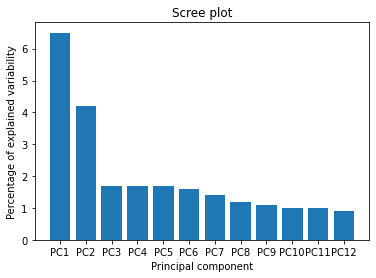

In [142]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variability')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()  # grande parte da variabilidade está presente nos primeiros 9 componentes (cut-off point de 2). Estes 9 PC podem fazer uma boa representaçao geral dos dados

In [143]:

#Guardar as labels das amostras numa variavel unica de modo a colocar como indice na data frame dos PCs
sample_labels = final_df.index

pca_df = pd.DataFrame(pca_data, index=[sample_labels], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1.701037,5.959307,-0.069529,-0.015657,-0.427703,-0.850785,-0.519815,-0.086014,0.069363,0.041112,-0.058697,0.017408
1,1.562103,4.898367,-0.059476,-0.050718,-0.252203,-0.343311,-0.197784,-0.035464,-0.031149,-0.046061,0.003078,0.238733
2,1.420237,5.452449,-0.077977,-0.006840,-0.350529,-0.735414,-0.489888,-0.091527,0.063487,0.000478,-0.046866,-0.009055
3,1.562103,4.898367,-0.059476,-0.050718,-0.252203,-0.343311,-0.197784,-0.035464,-0.031149,-0.046061,0.003078,0.238733
4,1.420237,5.452449,-0.077977,-0.006840,-0.350529,-0.735414,-0.489888,-0.091527,0.063487,0.000478,-0.046866,-0.009055
...,...,...,...,...,...,...,...,...,...,...,...,...
20105,-2.003313,-0.594635,0.018870,0.001800,-0.140756,-0.239075,-0.275944,-0.056469,0.033280,-0.036557,0.021216,-0.015163
20106,-2.268781,-2.038179,-0.075367,0.006875,0.134608,-0.076390,-0.200157,-0.047131,-0.126098,-0.095048,0.056471,0.046695
20107,-2.485554,-0.704025,-0.015961,-0.004400,-0.005094,-0.024239,-0.050613,-0.055616,-0.061115,-0.107800,0.057193,0.107654
20108,-2.350415,-2.079631,-0.073083,0.007956,0.134143,-0.070696,-0.196485,-0.048884,-0.122304,-0.096549,0.059727,0.047741


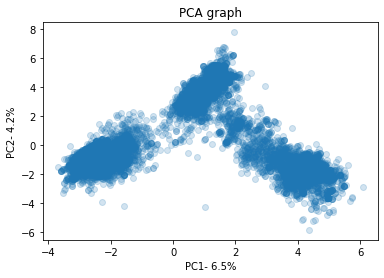

In [144]:


plt.scatter(pca_df.PC1, pca_df.PC2, alpha=0.2)
plt.title("PCA graph")
plt.xlabel('PC1- {0}%'.format(per_var[0]))
plt.ylabel('PC2- {0}%'.format(per_var[1]))
plt.show()

* KMeans clustering para identificar cluster (extrair os nossos clusters)


In [145]:
kmeans = KMeans(n_clusters=2, random_state=0) #como estamos a olhar para 2 PC, o n_clusters vai ser 2. O metodo 

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_df)
X_clustered

array([1, 1, 1, ..., 0, 0, 0])

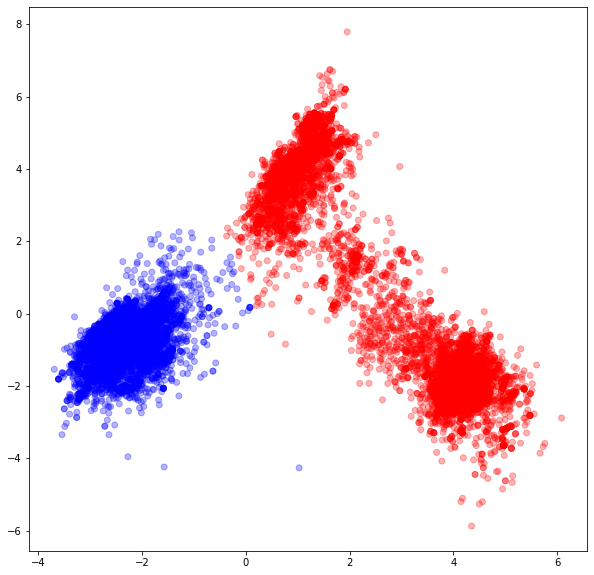

In [147]:
color_map = {0 : 'blue', 1 : 'red'} #alterar consoante o numero de componentes a analisar

label_color = [color_map[i] for i in X_clustered]
plt.figure(figsize = (10,10))
plt.scatter(pca_df.PC1,pca_df.PC2, c= label_color, alpha=0.3)
plt.show()